In [2]:
from statsmodels.regression.rolling import RollingOLS
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

In [3]:
#pandas read html
sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]

#clean data
sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')

symbols_list = sp500['Symbol'].unique().tolist()
#this list is not survivorship bias free. This means that some of the companies in the list are not in the S&P 500 anymore.

end_date = '2023-09-27'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8)

df = yf.download(tickers=symbols_list, 
                 start=start_date, 
                 end=end_date).stack()

df.index.names = ['date', 'ticker']

df.columns = df.columns.str.lower()


[*********************100%%**********************]  503 of 503 completed

4 Failed downloads:
['SOLV', 'VLTO', 'SW', 'GEV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


## Garman-Klass Volatility Equation

The Garman-Klass volatility is a measure of historical price volatility that uses the open, close, high, and low prices of a financial asset over a given period. The formula is given by:

$$
\sigma_{GK} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left[ 0.5 \left( \ln\left(\frac{H_i}{L_i}\right) \right)^2 - \left( 2 \ln(2) - 1 \right) \left( \ln\left(\frac{C_i}{O_i}\right) \right)^2 \right]}
$$


In [ ]:
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2) / 2 - (2*np.log(2)-1)*((np.log(df['adj close']) - np.log(df['open']))**2)

## RSI
The Relative Strength Index is a momentum indicator. It measures the speed and magnitude of a security's recent price changes to evaluate if overpriced or underpriced.
It is displayed as a line graph oscillating between 0 and 100. (> 70 = overbought, < 30 = oversold)

<Axes: xlabel='date'>

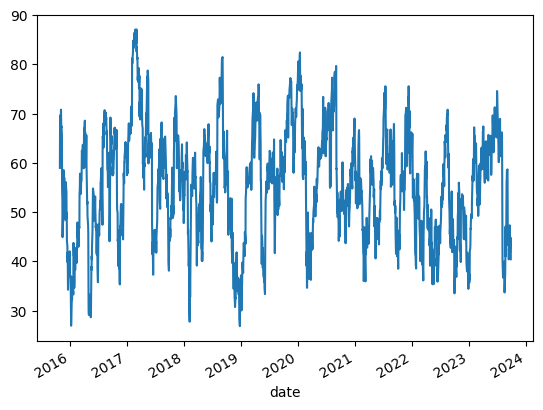

In [7]:
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))
df.xs('AAPL', level=1)['rsi'].plot()

## Bolllinger Bands
These are used to determine volatility of stocks. 